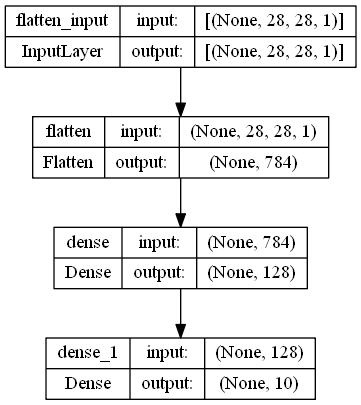

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

trainX = trainX / 255.0
testX = testX / 255.0

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# 모델 빌드
model.build(input_shape=(None, 28, 28, 1))

# 모델 그래프 그리기
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

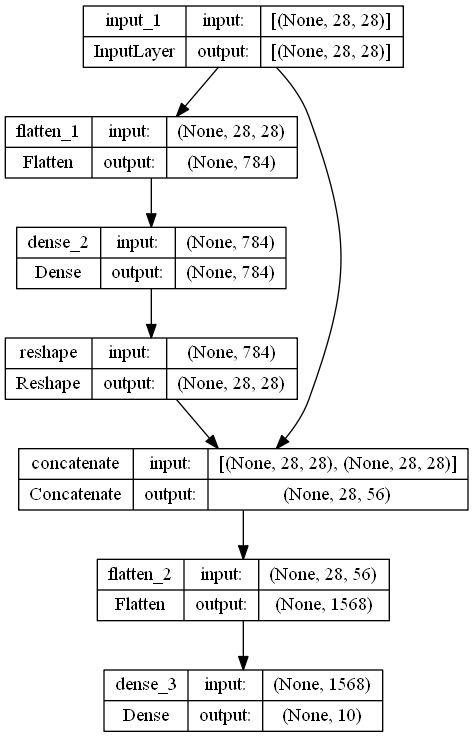

In [3]:
input1 = tf.keras.layers.Input(shape=[28, 28])
flatten1 = tf.keras.layers.Flatten()(input1)
dense1 = tf.keras.layers.Dense(28*28, activation='relu')(flatten1)
reshape1 = tf.keras.layers.Reshape((28, 28))(dense1)

concat1 = tf.keras.layers.Concatenate()([input1, reshape1])
flatten2 = tf.keras.layers.Flatten()(concat1)
output = tf.keras.layers.Dense(10, activation='softmax')(flatten2)

model = tf.keras.Model(input1, output)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

plot_model(model, to_file='model2.png', show_shapes=True, show_layer_names=True)